## Assignment 1 : Black Friday Sales EDA

##### Problem Statement : A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity), product details (productid and product category) and Total purchaseamount from last month. Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

#### Import Libraries

In [58]:
import numpy as np               #Data manipulation
import pandas as pd              #Mathematical Calculation
import matplotlib.pyplot as plt  #Visualisation
import seaborn as sns
%matplotlib inline

#### Upload Dataset

In [59]:
df=pd.read_csv('train.csv')
df.head() #Display the first few rows of the DataFrame

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#### Check basic statistics of dataset

In [3]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [4]:
df.shape

(550068, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df[df.duplicated()].shape

(0, 12)

In [8]:
df_cleaned = df.drop_duplicates()

In [9]:
df_cleaned.shape

(550068, 12)

#### Check for Missing Values

In [10]:
missing_values = df.isnull().sum()
print(missing_values)

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


In [11]:
# Fill missing values with the mean of the column
df['Product_Category_2'].fillna(df['Product_Category_2'].mean(), inplace=True)

# Fill missing values in 'Product_Category_3' with the median
df['Product_Category_3'].fillna(df['Product_Category_3'].median(), inplace=True)

In [12]:
#Dropping Missing Values
df.dropna(subset=['Product_Category_2', 'Product_Category_3'], inplace=True)

In [13]:
#Verify Missing Values
missing_values = df[['Product_Category_2', 'Product_Category_3']].isnull().sum()
print(missing_values)

Product_Category_2    0
Product_Category_3    0
dtype: int64


In [14]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,14.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,14.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,14.0,7969


In [15]:
#'inplace=True' will remove User_ID and will update the df.
df.drop(['User_ID'], axis=1, inplace=True, errors='ignore')

In [16]:
print(df.columns)

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')


In [17]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,9.842329,14.0,8370
1,P00248942,F,0-17,10,A,2,0,1,6.000000,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,9.842329,14.0,1422
3,P00085442,F,0-17,10,A,2,0,12,14.000000,14.0,1057
4,P00285442,M,55+,16,C,4+,0,8,9.842329,14.0,7969


In [18]:
#Handling Categorical Feature Gender
#map() will apply the given condition

df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,9.842329,14.0,8370
1,P00248942,0,0-17,10,A,2,0,1,6.000000,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,9.842329,14.0,1422
3,P00085442,0,0-17,10,A,2,0,12,14.000000,14.0,1057
4,P00285442,1,55+,16,C,4+,0,8,9.842329,14.0,7969


### check for unique values in data

In [19]:
#Handling Categorical Feature Gender.
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [20]:
#map() will apply the given condition.
df['Age']=df['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,9.842329,14.0,8370
1,P00248942,0,1,10,A,2,0,1,6.000000,14.0,15200
2,P00087842,0,1,10,A,2,0,12,9.842329,14.0,1422
3,P00085442,0,1,10,A,2,0,12,14.000000,14.0,1057
4,P00285442,1,7,16,C,4+,0,8,9.842329,14.0,7969


In [21]:
#fixing categorical city_category.
#The'get_dummies' function is used to convert categorical variables into dummy or indicator variables (0 or 1).
#'drop_first=True' There are three city categories columns, two is enough to explain dataset.
#df_city=pd.get_dummies(df['City_Category'],drop_first=True)
#df_city.head()

In [23]:
#combine df_city into df
#df=pd.concat([df,df_city],axis=1)
#df.head()

In [24]:
# drop city_category
#df.drop('City_Category',axis=1,inplace=True)
#df.head()

##### Check for missing values in the data

In [25]:
df.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [26]:
# Find out missing Values
df['Product_Category_2'].value_counts()

9.842329     173638
8.000000      64088
14.000000     55108
2.000000      49217
16.000000     43255
15.000000     37855
5.000000      26235
4.000000      25677
6.000000      16466
11.000000     14134
17.000000     13320
13.000000     10531
9.000000       5693
12.000000      5528
10.000000      3043
3.000000       2884
18.000000      2770
7.000000        626
Name: Product_Category_2, dtype: int64

In [27]:
# Replace the missing values with mode - Product_Category_2

In [28]:
#df['Product_Category_2'].mode()[0] #index

In [29]:
#df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2']).mode()[0]

In [30]:
#df['Product_Category_2'].isnull().sum()

In [31]:
# Replace the missing values with mode - Product_Category_3

In [32]:
#df['Product_Category_3'].unique()

In [33]:
#df['Product_Category_3'].value_counts()

In [34]:
#df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3']).mode()[0]

In [35]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,9.842329,14.0,8370
1,P00248942,0,1,10,A,2,0,1,6.000000,14.0,15200
2,P00087842,0,1,10,A,2,0,12,9.842329,14.0,1422
3,P00085442,0,1,10,A,2,0,12,14.000000,14.0,1057
4,P00285442,1,7,16,C,4+,0,8,9.842329,14.0,7969


In [36]:
df.shape

(550068, 11)

In [37]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [38]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6076\2063355665.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


In [39]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,9.842329,14.0,8370
1,P00248942,0,1,10,A,2,0,1,6.000000,14.0,15200
2,P00087842,0,1,10,A,2,0,12,9.842329,14.0,1422
3,P00085442,0,1,10,A,2,0,12,14.000000,14.0,1057
4,P00285442,1,7,16,C,4,0,8,9.842329,14.0,7969


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 46.2+ MB


In [41]:
#convert object into intgers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  int32  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int32(1), int64(6), object(2)
memory usage: 44.1+ MB


In [43]:
## A UINT8 is an 8-bit unsigned integer (range: 0 through 255 decimal). 
# Because a UINT8 is unsigned, its first bit (Most Significant Bit (MSB)) is not reserved for signing.

### Data Visualization 

#### Visualization Age vs Purchase 

<Axes: xlabel='Age', ylabel='Purchase'>

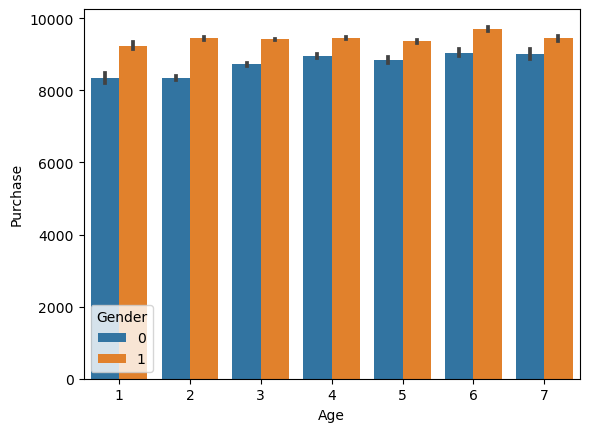

In [44]:
#The 'hue' parameter is used to distinguish or color-code the bars in the bar plot based on a categorical variable.
#sns.barplot('Age','Purchase',hue='Gender',data=df) 
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)

##### Observation: Purchases by men are higher than those by women in every age group.

#### Visualization of Occupation vs Purchased

<Axes: xlabel='Occupation', ylabel='Purchase'>

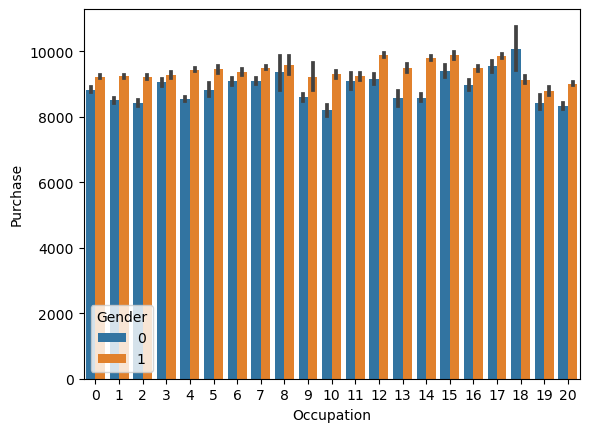

In [45]:
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=df)

#### Visualization of Product_category_1 vs Purchased

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

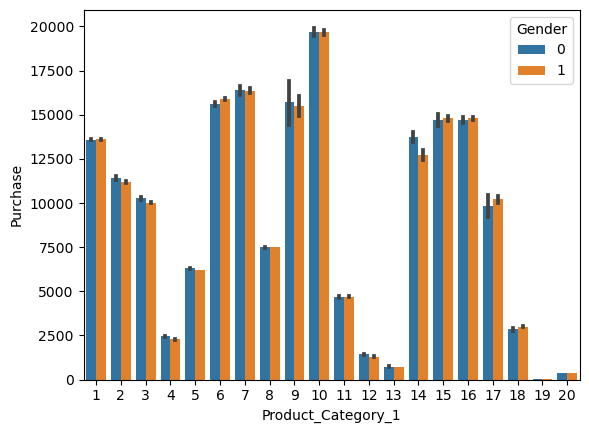

In [46]:
sns.barplot(x='Product_Category_1', y='Purchase', hue='Gender', data=df)

#### Visualization of Product_category_2 vs Purchased

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

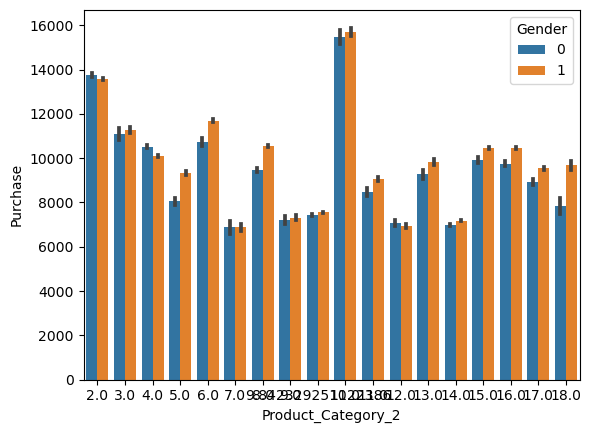

In [48]:
sns.barplot(x='Product_Category_2', y='Purchase', hue='Gender', data=df)

#### Visualization of Product_category_3 vs Purchased

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

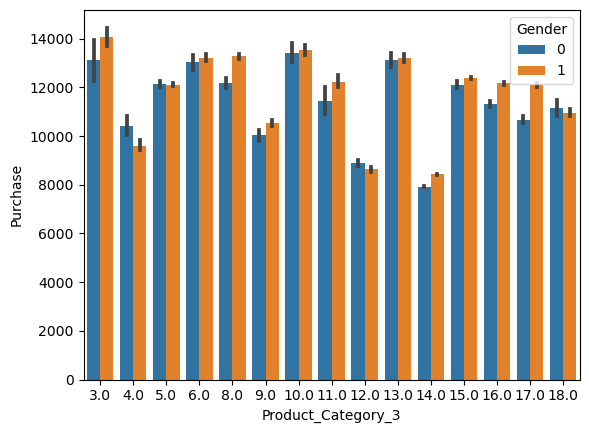

In [49]:
sns.barplot(x='Product_Category_3', y='Purchase', hue='Gender', data=df)

#### Visualization of City category pie chart

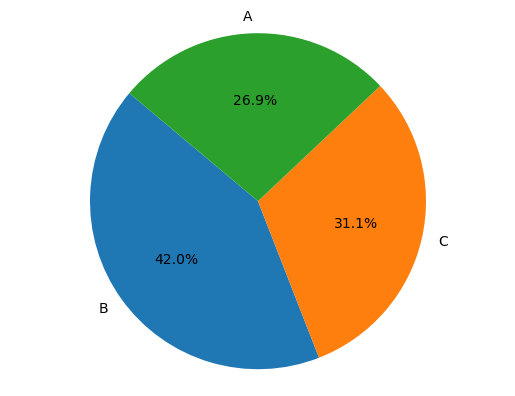

In [51]:
City_Category_counts = df['City_Category'].value_counts()
plt.pie(City_Category_counts, labels=City_Category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

In [52]:
print(df.columns)

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')


#### Scatter Plot between 'Age' and 'Purchase'

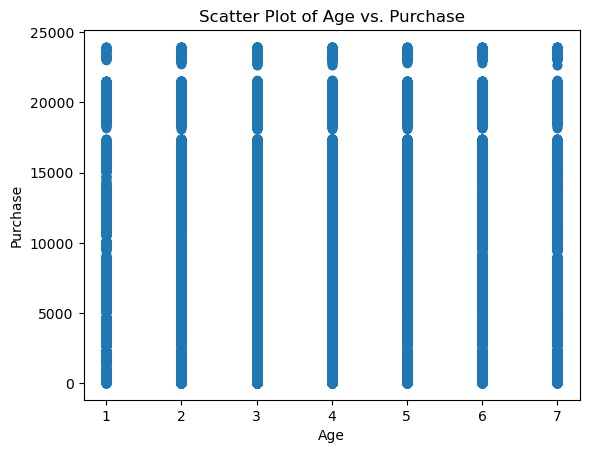

In [230]:
plt.scatter(df['Age'], df['Purchase'])
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.title('Scatter Plot of Age vs. Purchase')
plt.show()

#### Histogram of 'Purchase'

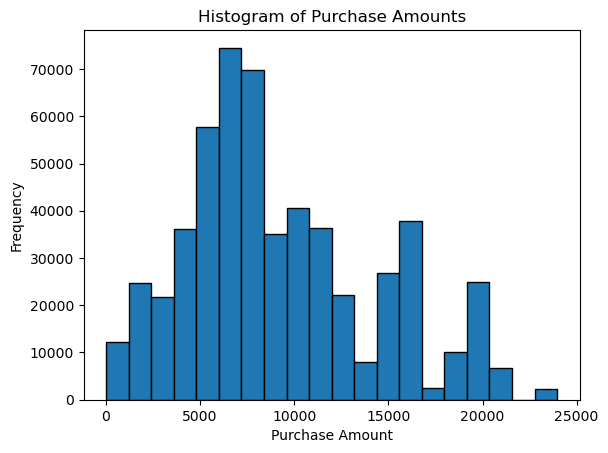

In [53]:
plt.hist(df['Purchase'], bins=20, edgecolor='k')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Purchase Amounts')
plt.show()

#### Box Plots for 'Product_Category_1', 'Product_Category_2', and 'Product_Category_3

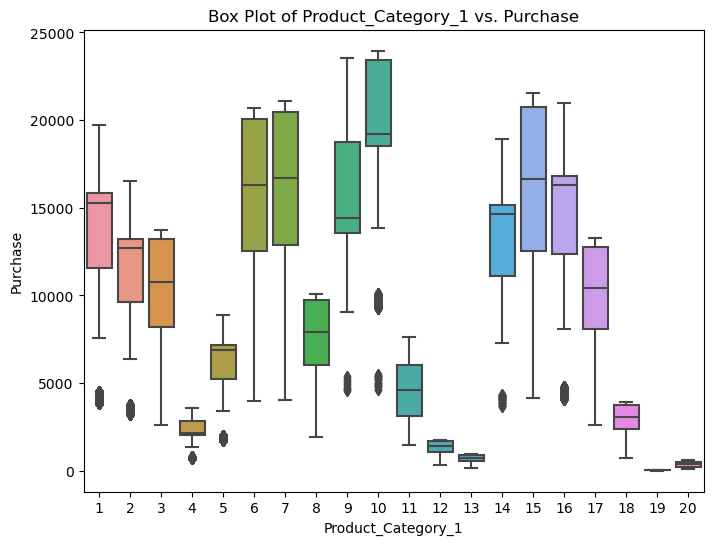

In [54]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Product_Category_1', y='Purchase', data=df)
plt.title('Box Plot of Product_Category_1 vs. Purchase')
plt.show()

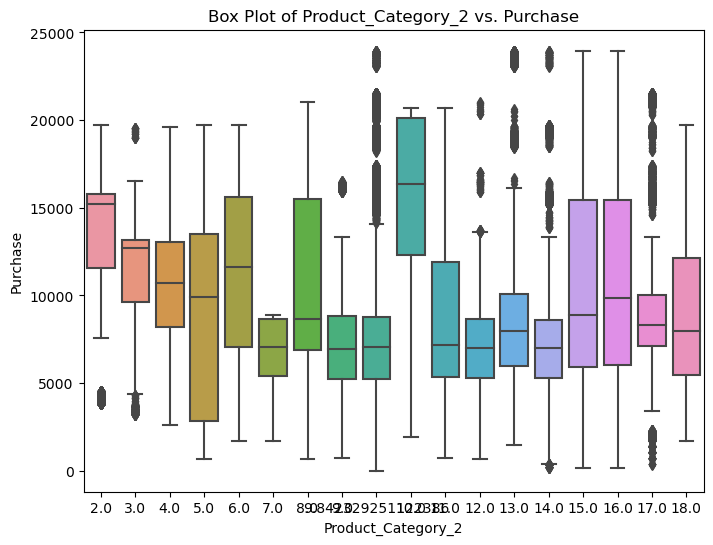

In [55]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Product_Category_2', y='Purchase', data=df)
plt.title('Box Plot of Product_Category_2 vs. Purchase')
plt.show()

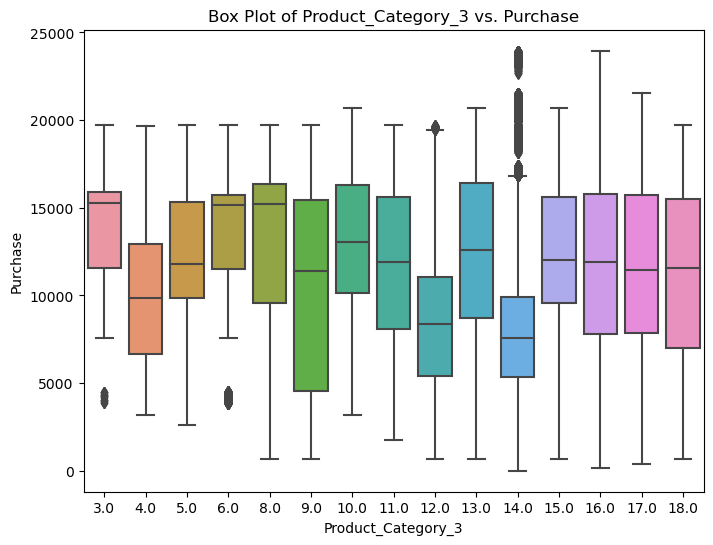

In [56]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Product_Category_3', y='Purchase', data=df)
plt.title('Box Plot of Product_Category_3 vs. Purchase')
plt.show()